# Wordcloud

In this part, we shall create notebooks for the wordcloud for the bot tweets and the human tweets. This is to get a general sense of the type of words used in both kinds of tweets

In [1]:
#import libraries needed for this step
import pandas as pd
import numpy as np
import re
import emoji
import nltk
import language_tool_python
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ruthk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
#Reading in the data
human_tweets = pd.read_csv('human_tweets_processed.csv')

In [4]:
human_tweets.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,source,user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,bot,cleaned_text
0,0,0,1555987,549097411394940928,@KyleDavidHall @YouTube YASS THANKS BABE,"<a href=""http://twitter.com/download/iphone"" r...",2.193435e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.0,Sun Dec 28 06:59:59 +0000 2014,0,__user_mention__ __user_mention__ YASS THANKS ...
1,1,1,1585626,566021410649145345,RT @AbnInfVet: ...And Then Bloomberg Says He D...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2.198399e+09,5.660208e+17,11.0,0.0,0.0,3.0,0.0,1.0,Thu Feb 12 23:49:55 +0000 2015,0,RT __user_mention__ ...And Then Bloomberg Says...
2,2,3,1916698,489188089143648256,RT @lgbtqnation: Federal judge considers separ...,"<a href=""http://twitter.com/download/iphone"" r...",2.244691e+09,4.891829e+17,10.0,0.0,0.0,1.0,1.0,1.0,Tue Jul 15 23:21:43 +0000 2014,0,RT __user_mention__ Federal judge considers se...
3,3,5,1269997,494612842679517186,RT @OKFosterWishes: URGENT; Beds needed to get...,"<a href=""http://twitter.com/download/iphone"" r...",1.752381e+07,4.945571e+17,6.0,0.0,0.0,0.0,1.0,1.0,Wed Jul 30 22:37:45 +0000 2014,0,RT __user_mention__ URGENT; Beds needed to get...
4,4,8,2537638,572308471829299200,"RT @luke_brooks: N.America and EU! Our EP ""Wou...","<a href=""http://twitter.com/download/iphone"" r...",2.312113e+08,5.722651e+17,3587.0,0.0,0.0,0.0,1.0,1.0,Mon Mar 02 08:12:27 +0000 2015,0,"RT __user_mention__ N.America and EU! Our EP ""..."


In [5]:
#We shall use the already cleaned tweets for this task
human_tweets_text = human_tweets[['cleaned_text']].copy()

In [6]:
bot_tweets_social = pd.read_csv('bot_tweets_social_processed.csv')

In [7]:
bot_tweets_fake = pd.read_csv('bot_tweets_fake_processed.csv')

In [8]:
bot_tweets_social_text = bot_tweets_social[['cleaned_text']].copy()
bot_tweets_fake_text = bot_tweets_fake[['cleaned_text']].copy()

## Human Tweets

In [9]:
#First, we shall generate the wordcloud for human users

human_tweets_text['tokenized'] = human_tweets_text['cleaned_text'].apply(word_tokenize)

In [10]:
human_tweets_text.head()

,cleaned_text,tokenized
0,__user_mention__ __user_mention__ YASS THANKS ...,"[__user_mention__, __user_mention__, YASS, THA..."
1,RT __user_mention__ ...And Then Bloomberg Says...,"[RT, __user_mention__, ..., And, Then, Bloombe..."
2,RT __user_mention__ Federal judge considers se...,"[RT, __user_mention__, Federal, judge, conside..."
3,RT __user_mention__ URGENT; Beds needed to get...,"[RT, __user_mention__, URGENT, ;, Beds, needed..."
4,"RT __user_mention__ N.America and EU! Our EP ""...","[RT, __user_mention__, N.America, and, EU, !, ..."


In [11]:
#include the list of stop words and contextual stop words and instantiate a lemmatizer
stop = set(stopwords.words('english'))
contextual_stop = ["__user_mention__", "__hashtag__", "rt", "u", 'r', 't', "'s", "'m", 'amp', 'one', 'love', "n't"]
lemmatizer = WordNetLemmatizer()

In [12]:
#remove all stop words
human_tweets_text['processed_data'] = human_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])
human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x: [word.strip() for word in x])

#perform lemmatization
human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

human_tweets_text['processed_data'] = human_tweets_text.processed_data.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])

In [13]:
#join the processed tokens to form a sentence
human_tweets_text['sentence'] = human_tweets_text['processed_data'].apply(lambda x:' '.join(x))

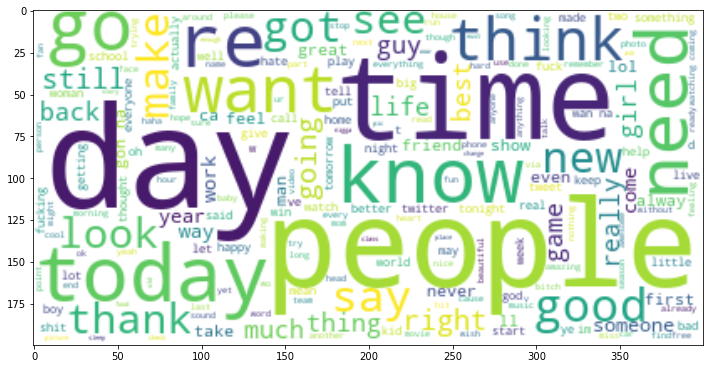

In [14]:
#Create a big sentence for humans joining all human tweets together
big_sentence = ''

for sentence in human_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

## Bot Tweets

In [15]:
#now we do the same for bots
bot_tweets_text = pd.concat([bot_tweets_social_text, bot_tweets_fake_text], axis = 0)

In [16]:
bot_tweets_text['tokenized'] = bot_tweets_text['cleaned_text'].apply(word_tokenize)

In [17]:
#remove all stop words
bot_tweets_text['processed_data'] = bot_tweets_text.tokenized.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])
bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x: [word.strip() for word in x])

#perform lemmatization
bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

bot_tweets_text['processed_data'] = bot_tweets_text.processed_data.apply(lambda x: [word.casefold() for word in x if word.casefold() not in stop
                                                                        and word.casefold() not in contextual_stop])

In [18]:
#join the processed tokens to form a sentence
bot_tweets_text['sentence'] = bot_tweets_text['processed_data'].apply(lambda x:' '.join(x))

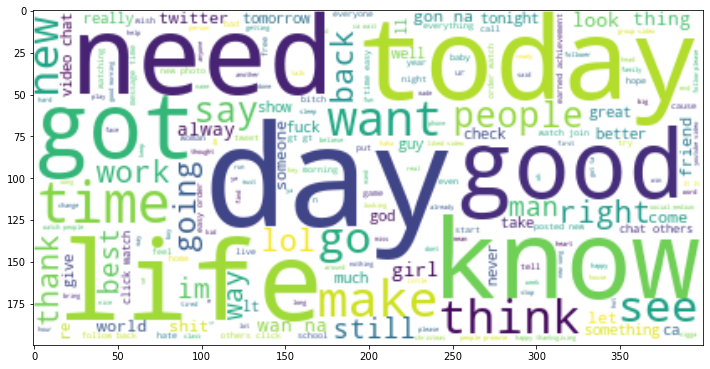

In [19]:
#Create a big sentence for bots joining all bot tweets together
big_sentence = ''

for sentence in bot_tweets_text['sentence']:
    big_sentence += sentence
    
wordcloud = WordCloud(background_color = "white").generate(text = big_sentence)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')

# Analysing Textual Features

In [20]:
df_tweets_all = pd.concat([human_tweets, bot_tweets_fake, bot_tweets_social])
df_tweets_all = df_tweets_all.reset_index(inplace = False, drop = True)

In [21]:
df_tweets_all = df_tweets_all.rename(columns = {"bot": "account_type"})
df_tweets_all

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,source,user_id,retweeted_status_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,account_type,cleaned_text
0,0,0,1555987,549097411394940928,@KyleDavidHall @YouTube YASS THANKS BABE,"<a href=""http://twitter.com/download/iphone"" r...",2.193435e+09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2.0,Sun Dec 28 06:59:59 +0000 2014,0,__user_mention__ __user_mention__ YASS THANKS ...
1,1,1,1585626,566021410649145345,RT @AbnInfVet: ...And Then Bloomberg Says He D...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2.198399e+09,5.660208e+17,11.0,0.0,0.0,3.0,0.0,1.0,Thu Feb 12 23:49:55 +0000 2015,0,RT __user_mention__ ...And Then Bloomberg Says...
2,2,3,1916698,489188089143648256,RT @lgbtqnation: Federal judge considers separ...,"<a href=""http://twitter.com/download/iphone"" r...",2.244691e+09,4.891829e+17,10.0,0.0,0.0,1.0,1.0,1.0,Tue Jul 15 23:21:43 +0000 2014,0,RT __user_mention__ Federal judge considers se...
3,3,5,1269997,494612842679517186,RT @OKFosterWishes: URGENT; Beds needed to get...,"<a href=""http://twitter.com/download/iphone"" r...",1.752381e+07,4.945571e+17,6.0,0.0,0.0,0.0,1.0,1.0,Wed Jul 30 22:37:45 +0000 2014,0,RT __user_mention__ URGENT; Beds needed to get...
4,4,8,2537638,572308471829299200,"RT @luke_brooks: N.America and EU! Our EP ""Wou...","<a href=""http://twitter.com/download/iphone"" r...",2.312113e+08,5.722651e+17,3587.0,0.0,0.0,0.0,1.0,1.0,Mon Mar 02 08:12:27 +0000 2015,0,"RT __user_mention__ N.America and EU! Our EP ""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248177,42222,99990,125115,224967602886279168,theawkwardmoment#theawkwardmoment when you sta...,web,6.162121e+08,NaN,0.0,0.0,0.0,1.0,0.0,0.0,Mon Jul 16 20:43:50 +0000 2012,1,theawkwardmoment#theawkwardmoment when you sta...
248178,42223,99991,138446,218760002142351361,I will have the rest of the site updated when ...,web,6.162873e+08,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Fri Jun 29 17:37:03 +0000 2012,1,I will have the rest of the site updated when ...
248179,42224,99993,117139,314267535916814336,RT @EMANSANGELS: Follow @scottstorch and view ...,web,4.757323e+08,NaN,13783.0,0.0,0.0,0.0,0.0,2.0,Wed Mar 20 06:49:54 +0000 2013,1,RT __user_mention__ Follow __user_mention__ an...
248180,42225,99998,141229,312307989212192769,Stupidity in numbers. penn state riot,web,6.162999e+08,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Thu Mar 14 21:03:21 +0000 2013,1,Stupidity in numbers. penn state riot


## Barplots and Stripplots

### Retweet Count

<AxesSubplot:xlabel='account_type', ylabel='retweet_count'>

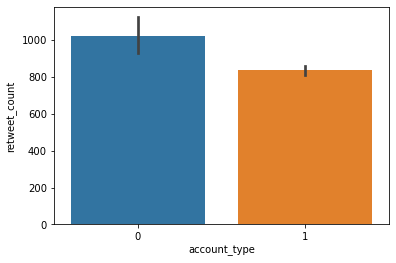

In [22]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "retweet_count")

<AxesSubplot:xlabel='account_type', ylabel='retweet_count'>

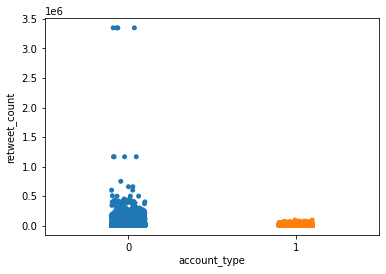

In [23]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "retweet_count")

### Favourite Count

<AxesSubplot:xlabel='account_type', ylabel='favorite_count'>

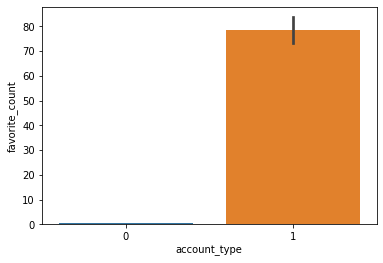

In [24]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "favorite_count")

<AxesSubplot:xlabel='account_type', ylabel='favorite_count'>

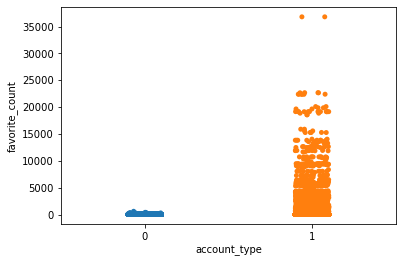

In [25]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "favorite_count")

### Num of Hashtags

<AxesSubplot:xlabel='account_type', ylabel='num_hashtags'>

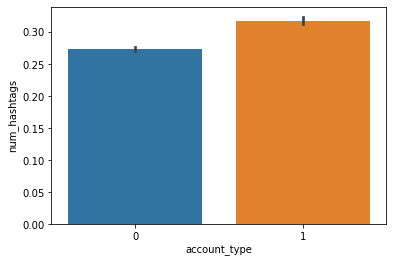

In [26]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_hashtags")

<AxesSubplot:xlabel='account_type', ylabel='num_hashtags'>

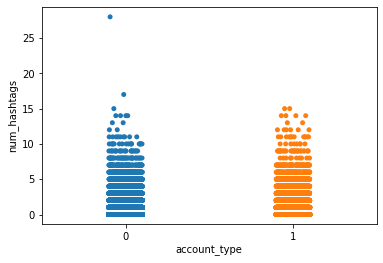

In [27]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_hashtags")

### Num of URLs

<AxesSubplot:xlabel='account_type', ylabel='num_urls'>

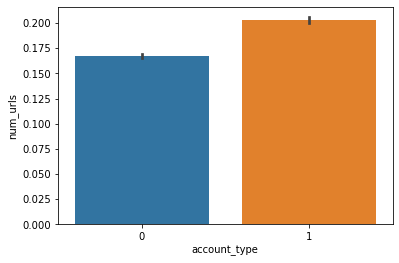

In [28]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_urls")

<AxesSubplot:xlabel='account_type', ylabel='num_urls'>

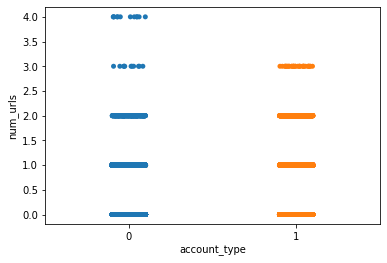

In [29]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_urls")

### Num of Mentions

<AxesSubplot:xlabel='account_type', ylabel='num_mentions'>

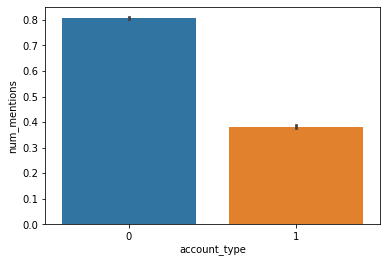

In [30]:
sns.barplot(data = df_tweets_all, x = "account_type", y = "num_mentions")

<AxesSubplot:xlabel='account_type', ylabel='num_mentions'>

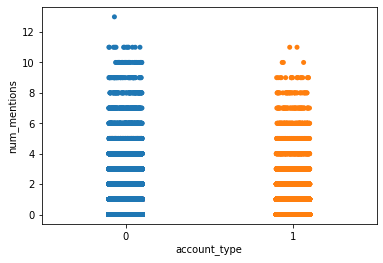

In [31]:
sns.stripplot(data = df_tweets_all, x = "account_type", y = "num_mentions")

## Correlation Analysis

In [32]:
human_tweets = df_tweets_all[df_tweets_all['account_type'] == 0]
bot_tweets = df_tweets_all[df_tweets_all['account_type'] == 1]

<AxesSubplot:>

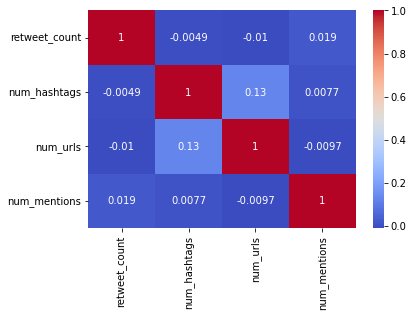

In [33]:
relevant_values_human = human_tweets[['retweet_count','num_hashtags', 'num_urls', 'num_mentions']]
sns.heatmap(relevant_values_human.corr(),cmap ='coolwarm', annot=True,)

<AxesSubplot:>

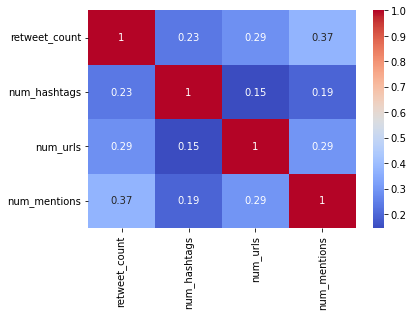

In [34]:
relevant_values_bot = bot_tweets[['retweet_count','num_hashtags', 'num_urls', 'num_mentions']]
sns.heatmap(relevant_values_bot.corr(),cmap ='coolwarm', annot=True,)